# 张云皓+2021103838+编程基础期末作业
该报告在处理数据时用到了pandas，numpy，matplotlib，seaborn，plotnine等包，在进行数据分析时用到了sklearn，statsmodels

# 一.探索性分析
## 1.数据信息

In [6]:
#导入需要用到的包
import pandas as pd
import datetime
from plotnine import *
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
#读取数据
df1 = pd.read_csv('C:\\Users\\Zyh\\Desktop\\PRSA_Data_20130301-20170228\\PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df2 = pd.read_csv('C:\\Users\\Zyh\\Desktop\\PRSA_Data_20130301-20170228\\PRSA_Data_Changping_20130301-20170228.csv')
df3 = pd.read_csv('C:\\Users\\Zyh\\Desktop\\PRSA_Data_20130301-20170228\\PRSA_Data_Shunyi_20130301-20170228.csv')
df4 = pd.read_csv('C:\\Users\\Zyh\\Desktop\\PRSA_Data_20130301-20170228\\PRSA_Data_Dongsi_20130301-20170228.csv')
df5 = pd.read_csv('C:\\Users\\Zyh\\Desktop\\PRSA_Data_20130301-20170228\\PRSA_Data_Huairou_20130301-20170228.csv')
df5.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


## 2.数据的简单预处理

In [8]:
#缺失值处理：自定义一异常类，若数据中有缺失值，则异常
class MyError(Exception):
    pass
class NaN_Error(MyError):
    def __init__(self,dataframe):
        self.dataframe = dataframe
    def __str__(self):
        return f'数据集中存在{self.dataframe.isnull().any(axis=1).sum()}个样本中存在缺失值，需要处理！'
    
#定义一个函数来检测数据集中是否有样本存在缺失值，如果有就抛出异常则删去该样本   
def NaN_detector(dataframe):
    del dataframe['No']
    try:
        if dataframe.isnull().any(axis=1).sum() != 0:
            raise  NaN_Error(dataframe)
    except Exception as e:
        print(e)
        dataframe = dataframe.dropna(inplace=True)
    else:
        return '数据集中不存在缺失值。'

In [9]:
#调用函数检测缺失值并删去
NaN_detector(df1)
NaN_detector(df2)
NaN_detector(df3)
NaN_detector(df4)
NaN_detector(df5)
df1.dtypes

数据集中存在3249个样本中存在缺失值，需要处理！
数据集中存在2383个样本中存在缺失值，需要处理！
数据集中存在4870个样本中存在缺失值，需要处理！
数据集中存在4726个样本中存在缺失值，需要处理！
数据集中存在3356个样本中存在缺失值，需要处理！


year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

## 3.数据分析

In [10]:
#自定义函数提取数据集中PM2.5和station列，便于对不同地区PM2.5浓度进行比较
def pm_time(dataframe):
    station = dataframe['station'].iloc[1]
    dataframe['date'] = dataframe.apply(lambda x: datetime.datetime(year=x['year'],
                        month =x['month'],day = x['day']),axis = 1)
    dataframe = dataframe.set_index('date')
    pm = dataframe[['PM2.5']]
    pm = pm.groupby(pm.index).mean()
    pm['station'] = station
    return pm

In [11]:
#调用函数处理每组数据
df_pm1 = pm_time(df1)
df_pm2 = pm_time(df2)
df_pm3 = pm_time(df3)
df_pm4 = pm_time(df4)
df_pm5 = pm_time(df5)
df_pm5.head()

,PM2.5,station
date,,
2013-03-01,8.263158,Huairou
2013-03-02,33.478261,Huairou
2013-03-03,59.347826,Huairou
2013-03-04,19.105263,Huairou
2013-03-05,106.142857,Huairou


In [12]:
#将5个数据集合并为1个数据集，便于我们进行分析
df_pmall=pd.concat([df_pm1,df_pm2,df_pm3,df_pm4,df_pm5],ignore_index=False)

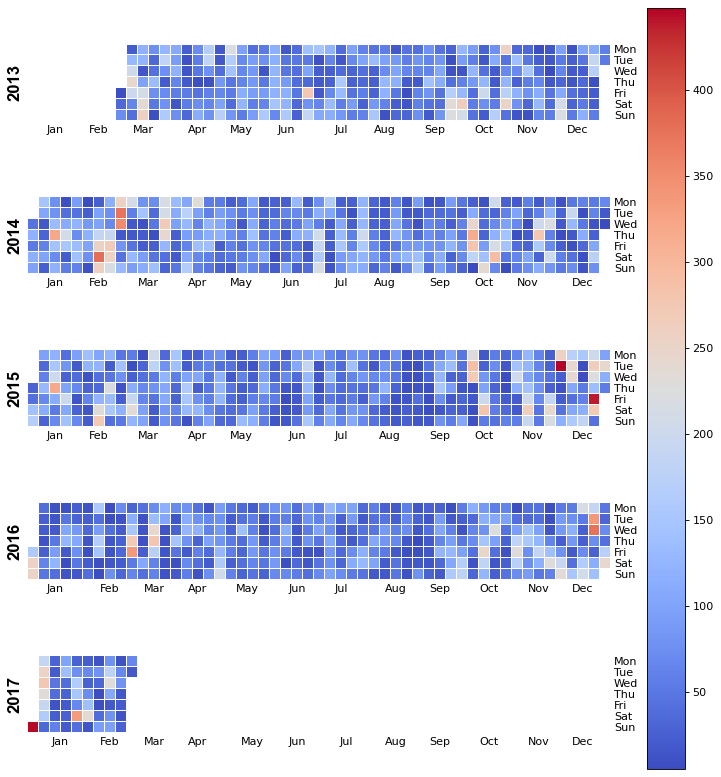

In [172]:
#用五个地区每天的PM2.5浓度均值表示北京市当天的PM2.5浓度，作日历图
import calmap
fig,ax = calmap.calendarplot(df_pmall[['PM2.5']].groupby(df_pmall.index).mean()['PM2.5'], fillcolor='white', 
                           linecolor='w',linewidth=0.1,cmap='coolwarm',
                           yearlabel_kws={'color':'black', 'fontsize':15},
                           fig_kws=dict(figsize=(10,10),dpi= 80))
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

C:\Users\Zyh\anaconda3\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


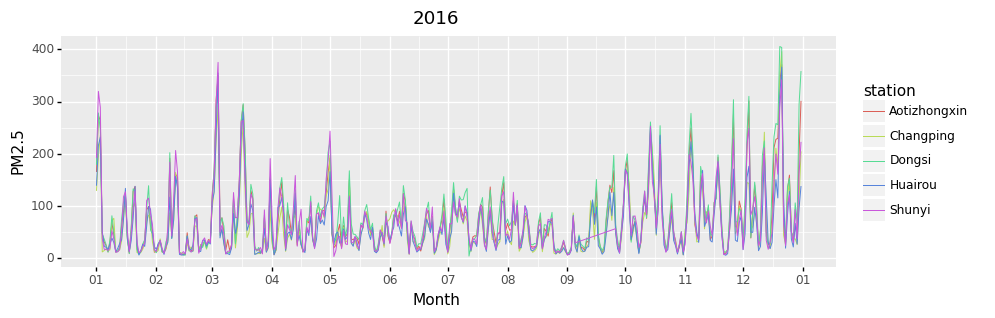

<ggplot: (100419993227)>

In [173]:
#不同地区PM2.5随时间变化曲线图，修改年份可得到不同年份曲线图
(
    ggplot(df_pmall.loc['2016'], aes(x = df_pmall.loc['2016'].index, y = 'PM2.5', group='station',color='station') )+
    geom_line(size=0.4)+
    scale_x_date(date_labels = "%m",date_breaks = "1 month")+
    scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
    xlab("Month")+ 
    ylab("PM2.5")+
    labs(title='2016')+
    theme(figure_size = (10,3))
)

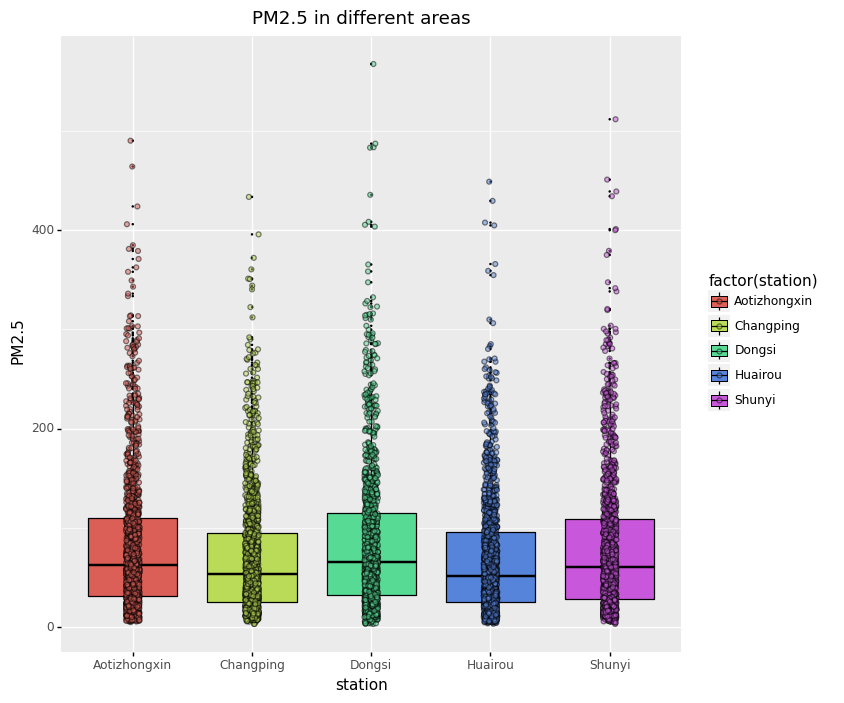

<ggplot: (124710249090)>

In [13]:
#不同地区2013年至2017年每一天PM2.5浓度值的箱线图
(
    ggplot(df_pmall, aes(x='station', y='PM2.5', fill='factor(station)'))
    + geom_boxplot(outlier_size=0, color='k', position=position_dodge(0.85)) 
    + geom_jitter(aes(group='factor(station)'), shape='o', alpha=0.5, 
                  position=position_jitterdodge(dodge_width=0.85))
    +labs(title='PM2.5 in different areas')
    +theme(figure_size = (8,8))
)

# 二.PM2.5浓度预测
## 1.线性回归模型

In [14]:
#在线性回归模型中，我们研究其他特征与PM2.5浓度之间的关系，尝试用这些特征来估计PM2.5浓度的值
#删去'date','year','month'这两列，将原始数据合并
df_all = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df_all.drop(['date','year','month','day'],axis=1,inplace=True)
df_all = df_all.loc[:,['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM','wd','hour','station']]
df_all['hour']=df_all['hour'].astype(str)
df_all.dtypes

PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
WSPM       float64
wd          object
hour        object
station     object
dtype: object

In [15]:
#对数值型数据进行标准化
def normalize(df):
    mean = df.mean(axis=0)
    std = df.std(axis=0) 
    df = (df - mean)/std
    return df
df_all.loc[:,'PM2.5':'WSPM'] = normalize(df_all.loc[:,'PM2.5':'WSPM'])
df_all.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd,hour,station
0,-0.937393,-1.078967,-0.534330,-1.204422,-0.792232,0.356731,-1.211348,1.174203,-1.514971,-0.078846,2.077055,NNW,0,Aotizhongxin
1,-0.886192,-1.034526,-0.534330,-1.204422,-0.792232,0.356731,-1.246270,1.193394,-1.471375,-0.078846,2.315818,N,1,Aotizhongxin
2,-0.898992,-1.045636,-0.486291,-1.113749,-0.792232,0.284961,-1.246270,1.222181,-1.471375,-0.078846,3.032110,NNW,2,Aotizhongxin
3,-0.911792,-1.056746,-0.198055,-1.083525,-0.792232,0.267018,-1.272462,1.318138,-1.558566,-0.078846,1.042412,NW,3,Aotizhongxin
4,-0.950193,-1.090077,-0.150016,-1.053300,-0.792232,0.267018,-1.324847,1.385307,-1.565832,-0.078846,0.166945,N,4,Aotizhongxin


<AxesSubplot:>

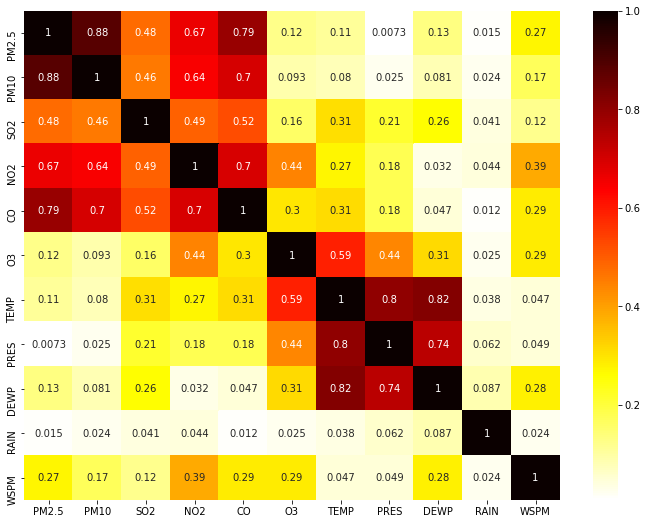

In [16]:
#可视化了解各数值型变量之间的相关性
data_corr = df_all.corr().abs()
plt.subplots(figsize=(12,9))
sns.heatmap(data_corr,annot=True,cmap = 'hot_r')

In [17]:
#划分训练集和测试集，由于wd和station不是数值型变量，故我们采用独热码进行处理
from sklearn.model_selection import train_test_split
x = df_all.loc[:,'PM10':'station']
y = df_all.loc[:,['PM2.5']]
x = pd.get_dummies(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
x_train.head()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,...,hour_5,hour_6,hour_7,hour_8,hour_9,station_Aotizhongxin,station_Changping,station_Dongsi,station_Huairou,station_Shunyi
36883,-0.823431,0.090181,-0.992852,-0.792232,-0.067864,-1.036733,1.241372,-1.907329,-0.078846,3.987164,...,0,0,1,0,0,0,1,0,0,0
49506,-0.634557,-0.630409,-1.083525,-0.792232,0.554098,0.953867,-1.061589,0.018134,-0.078846,0.962824,...,0,0,0,0,0,0,1,0,0,0
76369,-1.090077,-0.630409,-1.174197,-0.881206,0.033766,0.168104,1.558029,-0.323363,-0.078846,1.917879,...,1,0,0,0,0,0,0,0,0,1
627,-0.101265,-0.005898,0.881052,-0.347361,-0.594221,-0.670044,0.684823,-0.032727,-0.078846,0.007769,...,0,0,0,0,0,1,0,0,0,0
58129,0.198712,0.138220,0.064997,-0.080439,0.410558,0.805445,-1.119163,0.592140,-0.078846,0.246533,...,0,0,0,0,0,0,1,0,0,0


In [18]:
#自定义类回归模型，将三种回归模型的拟合设为三种方法，只需要调用不同方法便可得到所选模型的MSE和r2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error,r2_score

class Regression_model:
    def __init__(self,x_train,x_test,y_train,y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
    def linear_model(self):
        model = LinearRegression()
        model.fit(x_train,y_train)
        pre_lm = model.predict(x_test)
        mse_lm = mean_squared_error(pre_lm,y_test)
        r2_lm = r2_score(y_test,pre_lm)
        plt.figure(figsize=(8,8))
        plt.scatter(y_test,pre_lm,color='r',s=1)
        plt.xlabel("PM2.5_real")
        plt.ylabel("PM2.5_prediction")
        plt.title('Linear Regression')
        plt.show()
        print(f"用线性回归模型进行预测，均方误差为{mse_lm},拟合度为{r2_lm}")
        
    def lasso_model(self):
        lambdas = np.logspace(-10,2,2000)
        lasso_cv = LassoCV(alphas = lambdas,normalize=True,cv=10,max_iter=10000)
        lasso_cv.fit(x_train,y_train)
        lasso = Lasso(alpha = lasso_cv.alpha_,normalize=True,max_iter=10000)
        lasso.fit(x_train,y_train)
        pre_lasso = lasso.predict(x_test)
        mse_lasso = mean_squared_error(y_test,pre_lasso)
        r2_lasso = r2_score(y_test,pre_lasso)
        plt.figure(figsize=(8,8))
        plt.scatter(y_test,pre_lasso,color='g',s=1)
        plt.xlabel("PM2.5_real")
        plt.ylabel("PM2.5_prediction")
        plt.title('Lasso Regression')
        plt.show()
        print(f"用Lasso回归进行预测，均方误差为{mse_lasso},拟合度为{r2_lasso}")
        
    def ridge_model(self):
        lambdas = np.logspace(-5,2,200)
        ridge_cv = RidgeCV(alphas = lambdas,normalize = True,scoring = "neg_mean_squared_error",cv = 10)
        ridge_cv.fit(x_train,y_train)
        model = Ridge(alpha = ridge_cv.alpha_,normalize=True)
        model.fit(x_train,y_train)
        pre_ridge = model.predict(x_test)
        mse_ridge = mean_squared_error(y_test,pre_ridge)
        r2_ridge = r2_score(y_test,pre_ridge)
        plt.figure(figsize=(8,8))
        plt.scatter(y_test,pre_ridge,color='b',s=1)
        plt.xlabel("PM2.5_real")
        plt.ylabel("PM2.5_prediction")
        plt.title('Ridge Regression')
        plt.show()
        print(f"用岭回归进行预测，均方误差为{mse_ridge},拟合度为{r2_ridge}")
        
Regression_pred = Regression_model(x_train,x_test,y_train,y_test)

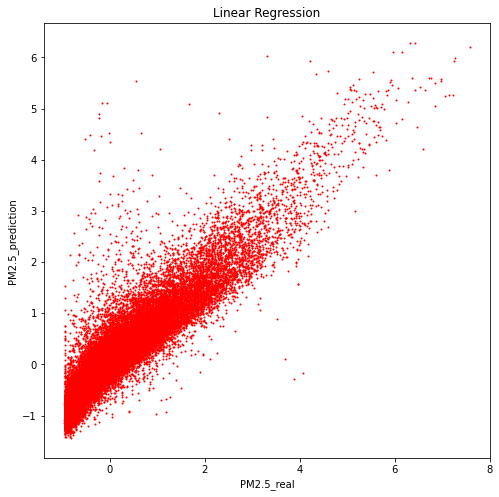

用线性回归模型进行预测，均方误差为0.14091753145848968,拟合度为0.8590186677356456


In [263]:
#分别调用三种模型的方法，作图并得到均方误差和拟合度
Regression_pred.linear_model()

C:\Users\Zyh\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


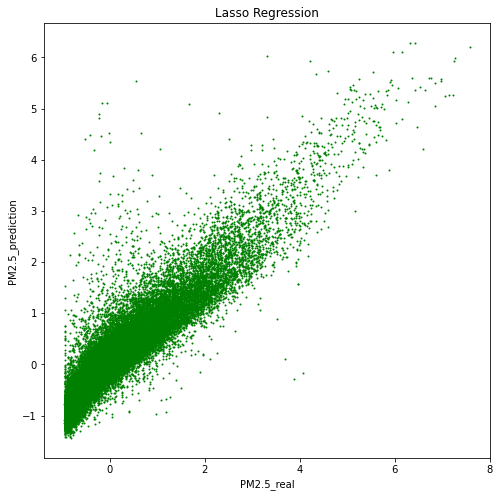

用Lasso回归进行预测，均方误差为0.14091748455217523,拟合度为0.859018714663197


In [264]:
Regression_pred.lasso_model()

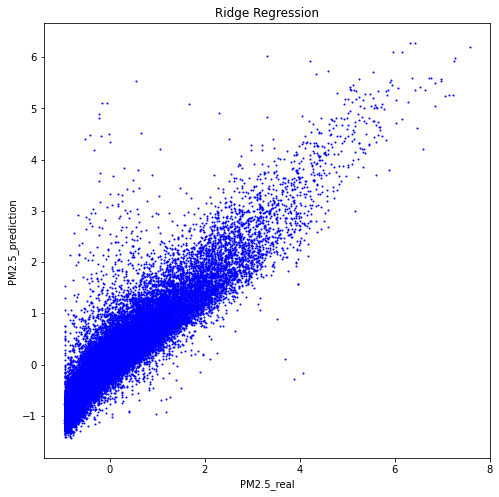

用岭回归进行预测，均方误差为0.140914506201393,拟合度为0.8590216943624359


In [261]:
Regression_pred.ridge_model()

## 2.ARMA模型

In [19]:
#以奥体中心站的数据为例，沿用之前处理好的数据df_pm1,删去station列，查看PM2.5浓度的大致情况
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
ts1 = df_pm1.drop(['station'],axis=1)
ts1

,PM2.5
date,
2013-03-01,7.125000
2013-03-02,30.750000
2013-03-03,76.916667
2013-03-04,23.428571
2013-03-05,148.875000
...,...
2017-02-24,21.541667
2017-02-25,11.208333
2017-02-26,28.125000


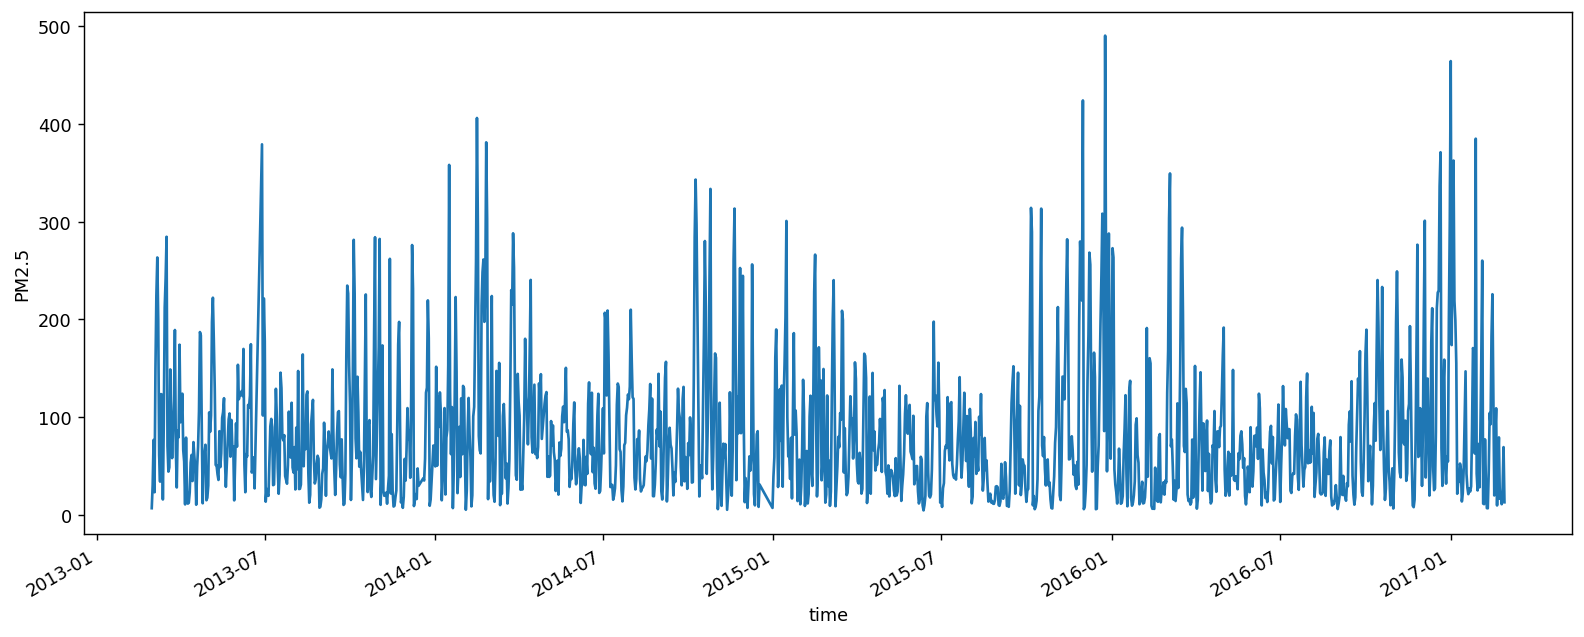

In [20]:
#查看序列趋势
plt.figure(figsize=(15,6),dpi=128)
ts1['PM2.5'].plot()
plt.xlabel("time")
plt.ylabel("PM2.5")
plt.show()

In [21]:
#进行ADF检验，判断序列是否平稳
from statsmodels.tsa.stattools import adfuller
adfuller(ts1)
#第一项为t统计量的值，第二项为p值，p值为0，可以拒绝原假设，认为序列平稳

(-20.99381275192323,
 0.0,
 1,
 1425,
 {'1%': -3.4349472763274638,
  '5%': -2.8635703796113248,
  '10%': -2.5678509622653123},
 15394.45754929835)

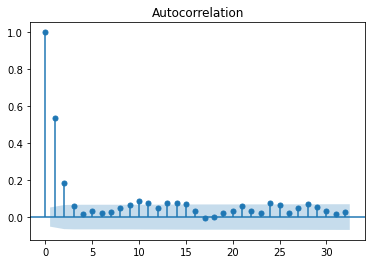

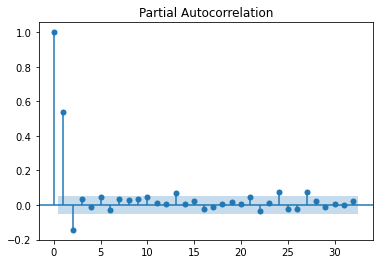

In [22]:
#作出序列的ACF和PACF图
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
plot_acf(ts1)
plot_pacf(ts1)
plt.show()

In [23]:
#根据信息准则选择ARMA模型的参数
pq = st.arma_order_select_ic(ts1, max_ar=5, max_ma=5, ic=['aic', 'bic'])
print('AIC:',pq.aic_min_order)
print('BIC:',pq.bic_min_order)

C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
C:\U

AIC: (4, 5)
BIC: (1, 1)


In [25]:
from statsmodels.tsa.arima_model import ARMA
def arma_forecast(ts,p,q):
    arma_model = ARMA(ts,(p,q))
    fitted = arma_model.fit()
    pred_arma = fitted.predict()
    plt.figure(figsize=(18,5))
    plt.plot(ts.index,ts.values)
    plt.plot(ts.index,pred_arma,color = 'red')
    plt.legend(["observed","forecast"])
    plt.title(f'ARMA({p},{q})')
    plt.show()

C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


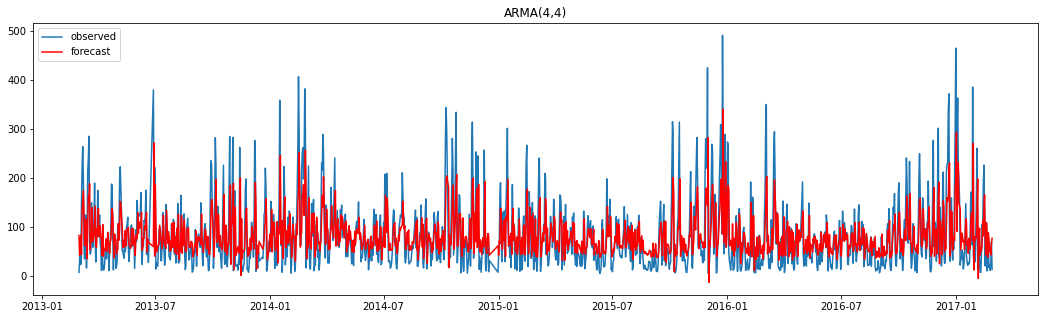

In [26]:
#参数（4，5）会使得程序报错，原因是计算过程参数无法收敛，故我们降低一阶
arma_forecast(ts1,4,4)

C:\Users\Zyh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


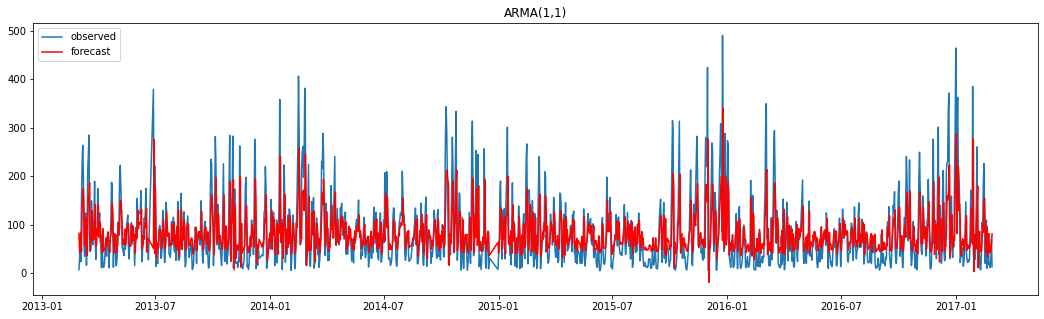

In [402]:
arma_forecast(ts1,1,1)